### Exercise 6.1
L'esercizio prevede la risoluzione del modello di Ising in una dimensione(in cui esso ha una soluzione analitica) attraverso metodi Monte-Carlo. Il modello di Ising modellizza il magnetismo di un materiale bulk attraverso la combinazione dei momenti di dipolo magnetici presenti al suo interno --> il reticolo viene schematizzato in modo che ad ogni nodo sia posizionato un dipolo magnetico che può assumere come valori solo $+1$ o $-1$.
L'Hamiltoniana di questo sistema è
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
con $\{ s_i \}_{i=1,N}$ valore degli spin e $J>0$ interazione di scambio (posta uguale a 1 per la simulazione). Per le condizioni al contorno imposte avrò che $s_{N+1}=s_1$. L'esercizio richiede dunque di simulare il modello di Ising per $N=50$ spin e calcolare le seguenti grandezze al variare della temperatura (da $0.5$ a $2$):

- $U(N,T) = \langle H \rangle_{h=0}$ energia interna del sistema
- $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ capacità termica del sistema
- $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$ suscettività magnetica
- $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$ magnetizzazione

Viene richiesto di utilizzare sia l'algoritmo di Metropolis (spiegato nella lezione 5) che l'algoritmo di Gibbs. L'algoritmo di gibbs può essere visto come l'algoritmo di Metropolis in cui però la mossa viene sempre accettata. La distribuzione di probabilità viene dunque splittata in 2: $pUp=\frac{1}{1+e^{-\beta\Delta E}}$ e $pDown=\frac{1}{1+e^{\beta\Delta E}}$ (mentre per Metropolis veniva usata come distribuzione di probabilità $e^{-\beta\Delta E}$).$\Delta E$ corrisponde alla differenza di energia tra due configurazioni che differiscono per un solo valore di spin, e viene calcolata come 
$$E_\nu-E_\mu =2Js_o(s_{o-1}+s_{o+1})$$
con $s_o$ spin scelto che cambierà il suo valore secondo la distribuzione di probabilità e $s_{o-1},s_{o+1}$ valori degli spin adiacenti.
Dunque mentre per Metropolis lo spin cambierà valore (assumendo l'inverso del valore che aveva inizialmente) se la probabilità di accettazione risulta maggiore di un numero generato uniformemente tra 0 e 1, per l'algoritmo di Gibbs lo spin avrà valore $1$ o $-1$ a seconda se $pUp$<$pDown$ e viceversa,a prescindere dal valore di spin che aveva in partenza.

La simulazione viene condotta per 20 blocchi,ognuno composto da 10000 step, per ogni valore di temperatura (da $0.5$ a $2$ a step di $0.05$ per volta). Mentre all'inizio della simulazione gli spin sono assegnati casualmente, ogni volta che avviene il cambio di temperatura gli spin assumono il valore della configurazione subito precedente.

Riporto i grafici per le grandezze sopracitate in cui è presente il valore atteso della grandezza in questione (calcolata con la formula analitica) al variare della temperatura e quelli calcolati con i due algoritmi con le relative barre d'errore.
Come si evince dai grafici entrambi gli algoritmi approssimano bene il valore atteso per tutte le grandezze, con errori trascurabili.

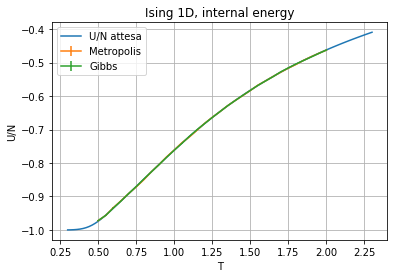

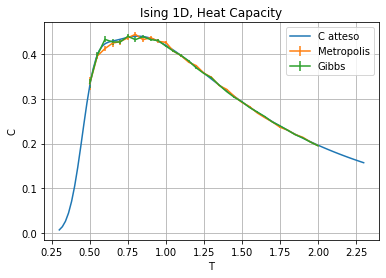

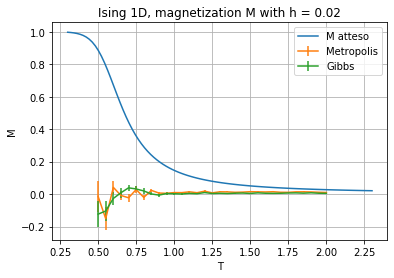

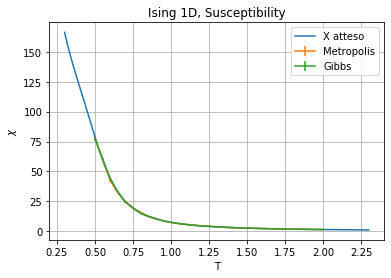

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

Gibbs=np.loadtxt("datiGibbs.dat")
Metr=np.loadtxt("datiMetr.dat")
Temp=np.loadtxt("temperatura.dat")

##Valore dell'energia atteso##
points=100
T = np.linspace(0.3,2.3,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
E = -J*( th + ch*thN )/( 1 + thN )
#Grafico
plt.plot(T,E,label="U/N attesa")       
plt.errorbar(Temp,Metr[:,0],Metr[:,1],label="Metropolis")
plt.errorbar(Temp,Gibbs[:,0],Gibbs[:,1],label="Gibbs")
plt.xlabel("T")
plt.ylabel("U/N")
plt.title("Ising 1D, internal energy")
plt.legend()
plt.grid(True)
plt.show()


##Valore Heat atteso##
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#Grafico
plt.plot(T,heat,label="C atteso")
plt.errorbar(Temp,Metr[:,2],Metr[:,3],label="Metropolis")
plt.errorbar(Temp,Gibbs[:,2],Gibbs[:,3],label="Gibbs")
plt.xlabel("T")
plt.ylabel("C")
plt.title("Ising 1D, Heat Capacity")
plt.legend()
plt.grid(True)
plt.show()


##Valore atteso Magnetizzazione##
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
#Grafico
plt.plot(T,M,label="M atteso")
plt.errorbar(Temp,Metr[:,6],Metr[:,7],label="Metropolis")
plt.errorbar(Temp,Gibbs[:,6],Gibbs[:,7],label="Gibbs")
plt.xlabel("T")
plt.ylabel("M")
plt.title("Ising 1D, magnetization M with h = 0.02")
plt.legend()
plt.grid(True)
plt.show()


##Valore atteso Suscettibilità magnetica##
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#Grafico
plt.plot(T, X,label="X atteso")
plt.errorbar(Temp,Metr[:,4],Metr[:,5],label="Metropolis")
plt.errorbar(Temp,Gibbs[:,4],Gibbs[:,5],label="Gibbs")
plt.xlabel("T")
plt.ylabel("$\chi$")
plt.title("Ising 1D, Susceptibility")
plt.legend()
plt.grid(True)
plt.show()

